# Exploratory analysis of Netflix

This EDA is based on Netflix dataset, in this project we gonna see the basic use of pandas and then we take some insights by using pandas and matplotlib and seaborne i also use some more tools like plotly and word cloud in this eda.
 
I try to explain things which im performing in this eda and if im not able to explain well then you can vsit `zero to pandas` vedio lectures for better understanding. 

Some things which we gonna see in this EDA :-

- How to import data set by using pandas. 
- How to filter our data set (i use some basic filltering which is enough for my eda purpose).
- Some insights of our Netflix dataset.
- How to use ploty for world map visualization.
- How to use word cloud and some more visualization charts
- Then in second last phase of my eda i ask some Question based on avalaible data.
- In the end i give a conclusion of what i do and learn while performing this EDA

All i learn aobut data analysis from jovian `zero to pandas` 

So, first thanks to team jovian and aakash sir for making this course free of coast without compromise with course material.

The libraries i used in this project are

>- Matplotlit
>- Seaborn
>- Pandas
>- Numpy
>- Jovian

if you not have installed these libraries first install them, then import. 

```pip install matplotlib seaborn numpy pandas plotly jovian --upgrade```

In [1]:
import jovian
import numpy as np
import pandas as pd

**Their Following Tasks are Implemented in the Project:**
>- Select a real-world dataset
>- Perform data preparation & cleaning
>- Perform exploratory analysis & visualization
>- sk & answer questions about the data
>- Summarize your inferences & write a conclusion

## Select a real-world dataset

I'm using netflix dataset from kaggle 
for load my csv(comma seprated values) data set i use ```pd.read_csv()``` Here pd is alias of pandas library.

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
project_name = "Netflix-Movies-Eda" 
project_name

'Netflix-Movies-Eda'

## Data Preparation and Cleaning


Now we have our dataset but befor Perform exploratory analysis & visualization we have to filter our dataset.


> **Tasks**
--------
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

### lets check for null values in our data set

In [4]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
netflix_df.isna().sum().sum()

3631

In our netflix dataset their are 3631 null values lets fix this problem.

In [6]:
# here we drop na values and store in netflix variable so now on i use netflix insted of netflix_df
netflix = netflix_df.dropna().replace('Unknown',0)

In [7]:
netflix.isna().sum().sum()

0

Now we dont have any null values.

Lets check for duplicate values.

In [8]:
netflix[netflix.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


so their is no duplicate record in my dataset

**Some information about our anime data set by using pandas**
>- netflix_df.head()
>- netflix_df.tail()
>- netflix_df.describe()
>- netflix_df.shape
>- netflix_df.info()
>- list(netflix_df.columns)

In [9]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [10]:
# netflix_df.tail()

In [11]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [12]:
netflix_df.shape


(7787, 12)

In [13]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 395.5+ KB


In [14]:
list(netflix_df.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

## Exploratory Analysis and Visualization

- Now after cleaning our data is ready for EDA and Visualization.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [15]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### First lets change a column name listed_in to genre.

In [16]:
netflix.rename(columns={'listed_in': 'genre'},
          inplace=True, errors='raise')

In [17]:
netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


### lets see totoal geren in our netflix dataset

In [18]:
netflix.genre.value_counts().count()

323

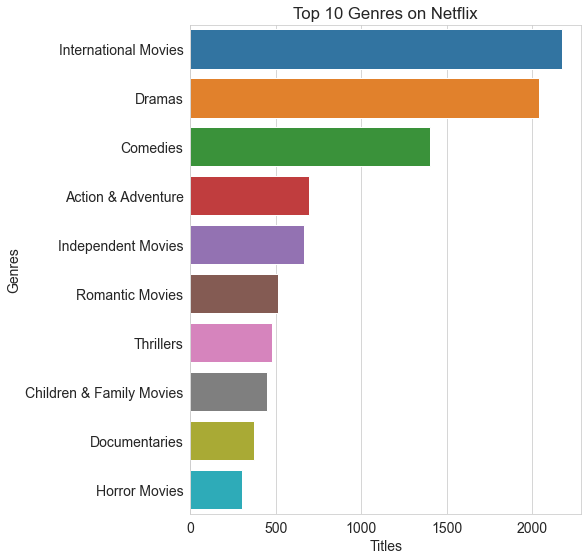

In [19]:
# genres = netflix.set_index('title').genre.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

# plt.figure(figsize=(7,9))
# genre = sns.countplot(y = genres, order=genres.value_counts().index[:10])
# plt.title('Top 10 Genres on Netflix')
# plt.xlabel('Titles')
# plt.ylabel('Genres')
# plt.show()

Let us save and upload our work to Jovian before continuing

lets see again our null values in heat map ... note i already delete my null values so i use netflix_df

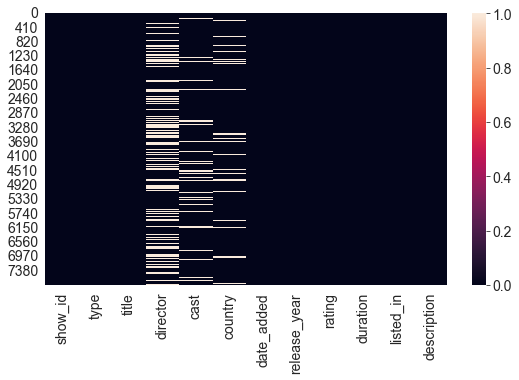

In [20]:
sns.heatmap(netflix_df.isnull());

As you can see their are lots of null values in director columns and also cast and country columns

but i aleady deal with them so lets go further.

### netflix types of shows

In [21]:
netflix.type.value_counts()

Movie      4673
TV Show     135
Name: type, dtype: int64

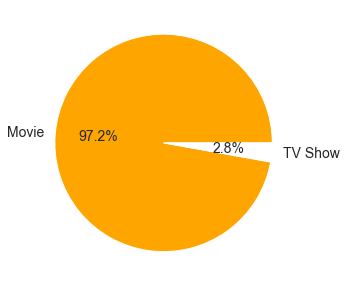

In [49]:
plt.pie(netflix.type.value_counts(), colors=['orange','white'],labels=netflix.type.value_counts().index,autopct='%1.1f%%');

### lets see how many directors are in our netflix dataset

In [23]:
netflix.director.value_counts().count()

3613

so we have total 3613 directors in our dataset ... which one is your favorite.

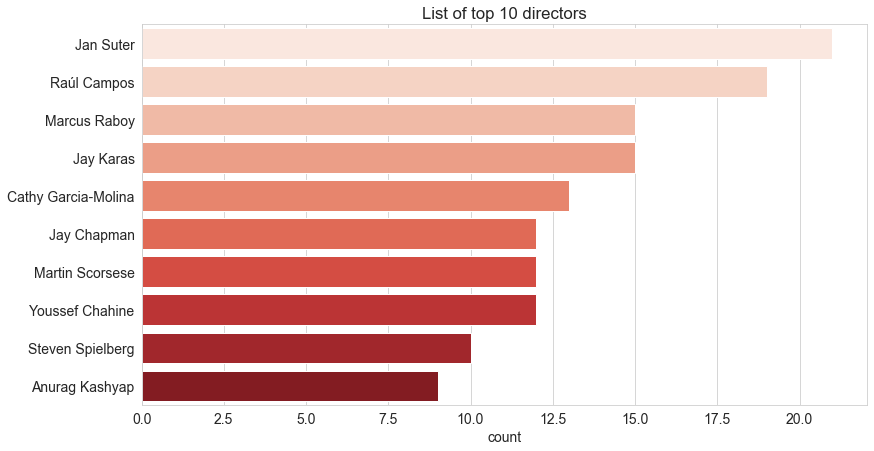

In [34]:
filtered_directors = netflix[netflix.genre != 'No genre'].director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('List of top 10 directors')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Reds')
plt.show()

so which one is your favorite, my favorite is anurag kashyap 

lets see them in world map :)

In [25]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [93]:
directors = netflix.country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
directors = directors[directors != 'Country Unavailable']

iplot([go.Choropleth(
    locationmode='country names',
    locations=directors,
    z=directors.value_counts())])

Here i use init_notebook_mode form plotly.offline for creating a world map and in this i use location mode as country name so i can see country wise info of 

### lets see some more graphs

if yout favorite director is not in top 10 then try to find in `200` .Here is word cloud of `200` best directors

<Figure size 864x432 with 0 Axes>

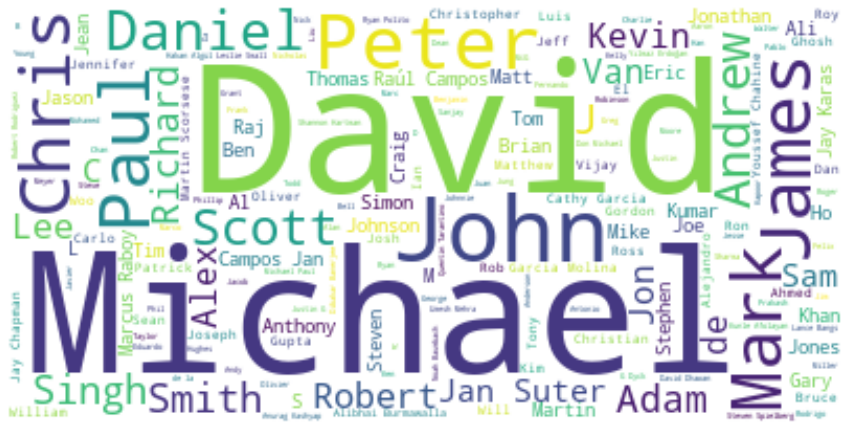

In [35]:
texts = " ".join(str(each) for each in netflix.director)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(texts)
plt.figure(figsize=(12,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.show()

Here i use word cloud which basically do the same work as it name

word cloud take randomly words and in the form of cloud with a beutiful repersention as you can see.

if you use whatsapp with your friends and wanna make a group t-shirts then you can use word cloud and print most use words in your clothes. (just a random thought)

### lets see the count of moives by countries

In [28]:
netflix[['country']].value_counts()

country                                             
United States                                           1653
India                                                    832
United Kingdom                                           174
Canada                                                   104
Egypt                                                     87
                                                        ... 
Ireland, United States, France                             1
Ireland, United States                                     1
Ireland, United Kingdom, United States                     1
Ireland, United Kingdom, Greece, France, Netherlands       1
Zimbabwe                                                   1
Length: 544, dtype: int64

Because netflix is American company and you probably see most of hollywood and western movies on netflix but due to infulence of indian community now days you can enjoy lots of bollywood and indian webseries and many more like kd,anime,tollywood,etc.

## Asking and Answering Questions

Now lets ask some questions 



#### Q1: What is the ratio of Movies before 2005 and after 2005 in our dataset?

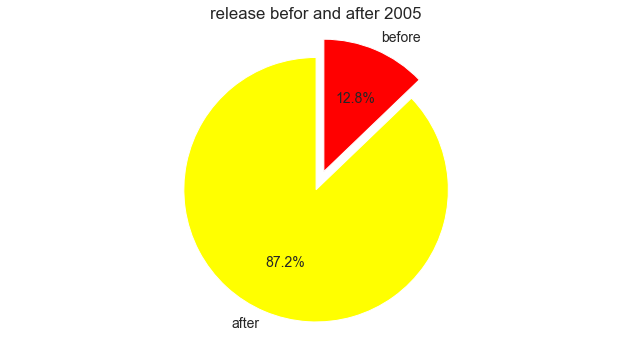

In [36]:
# sum the instances of above and below
above = (netflix['release_year'] >= 2005).sum()
below = (netflix['release_year'] <=2005 ).sum()

# put them into a list called proportions
proportions = [above, below]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    

    labels = ['after', 'before'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['yellow','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("release befor and after 2005")

# View the plot
plt.tight_layout()
plt.show()

here this pac man like thing is showing info about how many movies release before 2005(Red) and after 2005 (Yellow). 

you can change the year and see the df ratio.

#### Q2: How many types types of rating netflilx dataset contain ?

Here is graphical persentation of list of rating provided by netflix dataset

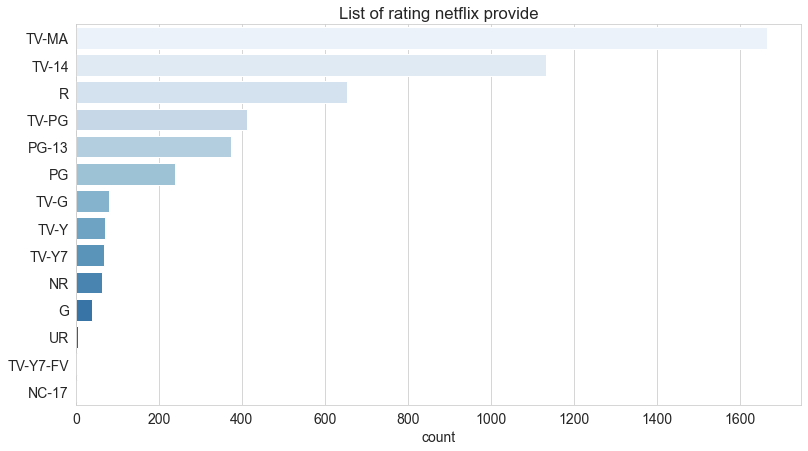

In [47]:
total = netflix.rating.value_counts().count()
rating = netflix[netflix.rating != 'No rating'].rating.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('List of rating netflix provide')
sns.countplot(y = rating, order=rating.value_counts().index[:total], palette='Blues');

As you can see we are not able to see clearly last two rows in our graphical persentaion but here you can see in tabular form also.

In [43]:
netflix.rating.value_counts()

TV-MA       1665
TV-14       1133
R            654
TV-PG        413
PG-13        375
PG           238
TV-G          80
TV-Y          71
TV-Y7         69
NR            62
G             38
UR             5
TV-Y7-FV       3
NC-17          2
Name: rating, dtype: int64

In [48]:
netflix.rating.value_counts().count()

14

so netflix provide 14 types of rating and amoung these ratings `TV-MA` is mostly found in netflix content and the least one is `NC-17`.

#### Q3: How many netflix content got the 'TV-MA' rating in United States  ?

In [63]:
netflix[netflix['rating']=='TV-MA'].shape

(1665, 12)

So, 1665 content got `TV-MA` rating in United States 

And here is our result in tabuler from.

In [64]:
netflix[(netflix['rating']=='TV-MA')&(netflix['country']=='United States')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
60,s61,Movie,12 ROUND GUN,Sam Upton,"Sam Upton, Jared Abrahamson, Mark Boone Junior...",United States,"March 14, 2019",2017,TV-MA,90 min,"Dramas, Independent Movies, Sports Movies",Dealing with personal demons and the death of ...
69,s70,Movie,14 Cameras,"Scott Hussion, Seth Fuller","Neville Archambault, Amber Midthunder, Brytnee...",United States,"October 27, 2018",2018,TV-MA,89 min,"Horror Movies, Thrillers","Upping the “13 Cameras” ante, this sequel find..."
75,s76,Movie,1BR,David Marmor,"Nicole Brydon Bloom, Giles Matthey, Taylor Nic...",United States,"August 23, 2020",2019,TV-MA,90 min,"Horror Movies, Independent Movies, Thrillers","Seeking her independence, a young woman moves ..."
76,s77,Movie,1st Summoning,Raymond Wood,"Hayley Lovitt, Teddy Cole, Brook Todd, Ace Har...",United States,"July 26, 2019",2018,TV-MA,94 min,"Horror Movies, Independent Movies",Student filmmakers uncover occult rituals tied...
...,...,...,...,...,...,...,...,...,...,...,...,...
7680,s7681,Movie,Wyatt Cenac: Brooklyn,Wyatt Cenac,Wyatt Cenac,United States,"October 21, 2014",2014,TV-MA,68 min,Stand-Up Comedy,Wyatt Cenac heads to Brooklyn to share his obs...
7685,s7686,Movie,XOXO,Christopher Louie,"Sarah Hyland, Graham Phillips, Chris D'Elia, H...",United States,"August 26, 2016",2016,TV-MA,92 min,"Dramas, Music & Musicals","The lives of a budding DJ, his loyal pal, a ho..."
7721,s7722,TV Show,You,Lee Toland Krieger,"Penn Badgley, Elizabeth Lail, Shay Mitchell, J...",United States,"December 26, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, Romantic TV Shows, TV Dramas","Obsessed with an aspiring writer, a charming b..."
7729,s7730,Movie,You Get Me,Brent Bonacorso,"Bella Thorne, Halston Sage, Taylor John Smith,...",United States,"June 23, 2017",2017,TV-MA,89 min,"Dramas, Thrillers","After a one-night stand, Holly develops a dang..."


#### Q4: What is maximum duration of Movie/shows on Netflix?

lets see how our duration is distributed

In [73]:
# netflix.duration.unique()

In [74]:
# by using dtypes i check the data type eg - int,float,bool etc
netflix.duration.dtypes

dtype('O')

 Our data type is object now first we have to convert our datatype into int

In [68]:
# here i split our duration column into two colulmns 'minutes and unit' by using srt.solit() function.
netflix[['minutes','unit']]=netflix['duration'].str.split(' ',expand = True)

In [72]:
# our maximum duration acording to our dataset in netflix 
netflix['minutes'].max()

'99'

So the maximum duration of Movie/shows on Netflix is 99 min

#### Q5: Show only the Titles and director of all content that were released in india only

In [90]:
# we have to filter our data set
netflix[netflix['country']=='India'][['title', 'director']]


,title,director
8,706,Shravan Kumar
9,1920,Vikram Bhatt
18,15-Aug,Swapnaneel Jayakar
20,​​Kuch Bheege Alfaaz,Onir
21,​Goli Soda 2,Vijay Milton
...,...,...
7764,Zero,Aanand Rai
7769,Zindagi Na Milegi Dobara,Zoya Akhtar
7776,Zokkomon,Satyajit Bhatkal
7780,Zoo,Shlok Sharma


Here is the list of titles and directors in netflix dataset and all the contents which was released in india only.

## Inferences and Conclusion

After completing this eda i can say netflix have huge varity of contents by contribution of various countries and directors which people can access almost every part of the gloab. 

Netflix is american company so we can see clear effect of this in content also, as i try to find contry vise distribution of content then clearly `usa is in majority of contents`.

Netflix contain two types of contant basically `movies` and `tv-showes` and `323 genre` which is a huge.

Basically this eda was perform for leaning and certification purpose so here you can see various ways to deal with data and take some insights with huge varities of graphical repersentations.

- Thanks for visit have a nice day.

## References and Future Work

**References**
- jovian.ml
- pandas.org
- medium.com
- youtube and gitgub `Data Talks`

**Future Work**
This is basically a Descriptive analysis of netflix dataset in future i want to put my hand on finance dataset and try to get some Inferences which hopefully help while making or imporving decision making in finance sector. 